 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [128]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [129]:
# Reading whale returns
whale_path = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(ascending=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [130]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [131]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [132]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(ascending=True)
algo_df.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [133]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [134]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [135]:
# Reading S&P 500 Closing Prices
sp500_path = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(ascending=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [136]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [137]:
# Fix Data Types
# Convert 'Close' column from string with dollar sign to float
sp500_df['Close'] = sp500_df['Close'].str.replace("$", "").astype(float)
sp500_df.head()

C:\Users\stell\AppData\Local\Temp\ipykernel_3736\3607683951.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace("$", "").astype(float)


,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [138]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [139]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [140]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['SP500']
sp500_daily_returns.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [141]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_df = pd.concat([whale_df, algo_df, sp500_daily_returns], axis="columns", join="inner")
joined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

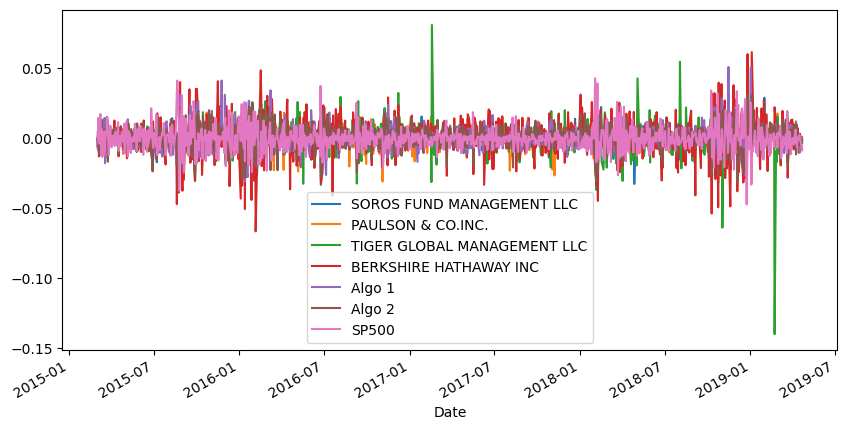

In [142]:
# Plot daily returns of all portfolios
# figsize = (10.5) makes the plot 10 inches wide and 5 inches tall
joined_df.plot(figsize=(10, 5))

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns (S&P 500, In-house, Whales)'}, xlabel='Date'>

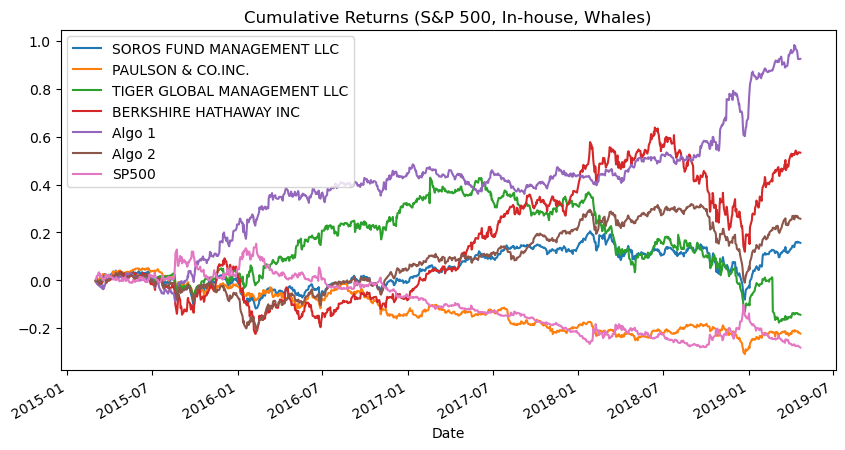

In [143]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_df).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5), title="Cumulative Returns (S&P 500, In-house, Whales)")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

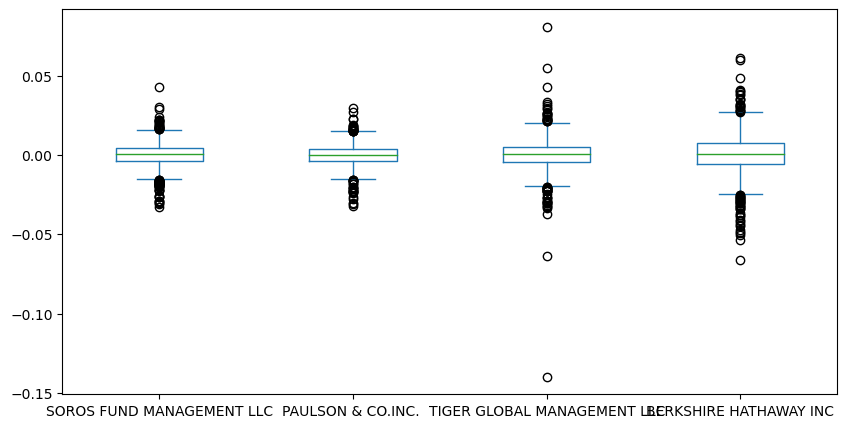

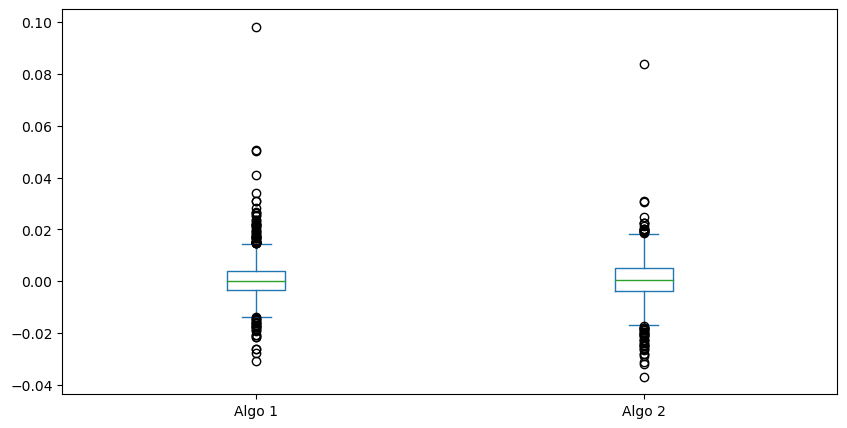

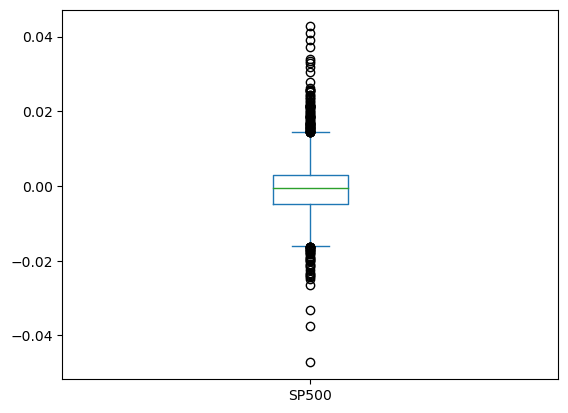

In [144]:
# Box plot to visually show risk
whale_df.plot(kind='box', figsize=(10,5))
algo_df.plot(kind='box',figsize=(10,5))
sp500_daily_returns.plot(kind='box')

### Calculate Standard Deviations

In [145]:
# standard deviation of in-house trading algorithms from my company
algo_std = algo_df.std()
algo_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [146]:
# standard deviations of whales
whale_std = whale_df.std()
whale_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [147]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_daily_returns.std()
sp500_std
# Determine which portfolios are riskier than the S&P 500
sorted_stds = pd.concat([sp500_std, algo_std, whale_std]).sort_values(ascending=True)
sorted_stds

# Algo 2, TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC are riskier than the S&P 500

PAULSON & CO.INC.              0.006977
SOROS FUND MANAGEMENT LLC      0.007842
Algo 1                         0.007988
SP500                          0.008135
Algo 2                         0.008466
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

### Calculate the Annualized Standard Deviation

In [148]:
# Calculate the annualized standard deviation (252 trading days)
annualized_stds = sorted_stds*np.sqrt(252)
annualized_stds

PAULSON & CO.INC.              0.110754
SOROS FUND MANAGEMENT LLC      0.124487
Algo 1                         0.126801
SP500                          0.129133
Algo 2                         0.134401
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [149]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
joined_df.rolling(window=21).std().tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006532
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006571
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006505
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006137
2019-04-22,0.005915,0.006400,0.006197,0.009104,0.005831,0.007113,0.004302


<Axes: xlabel='Date'>

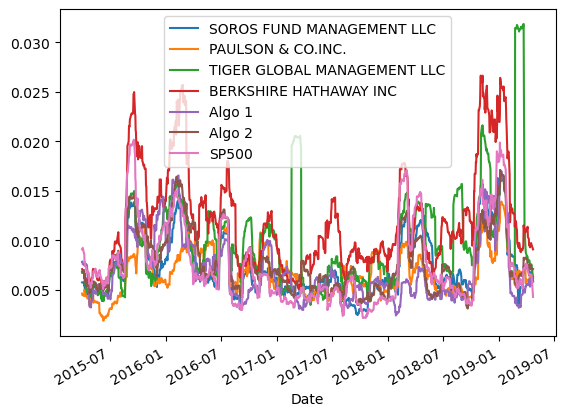

In [150]:
joined_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

<Axes: >

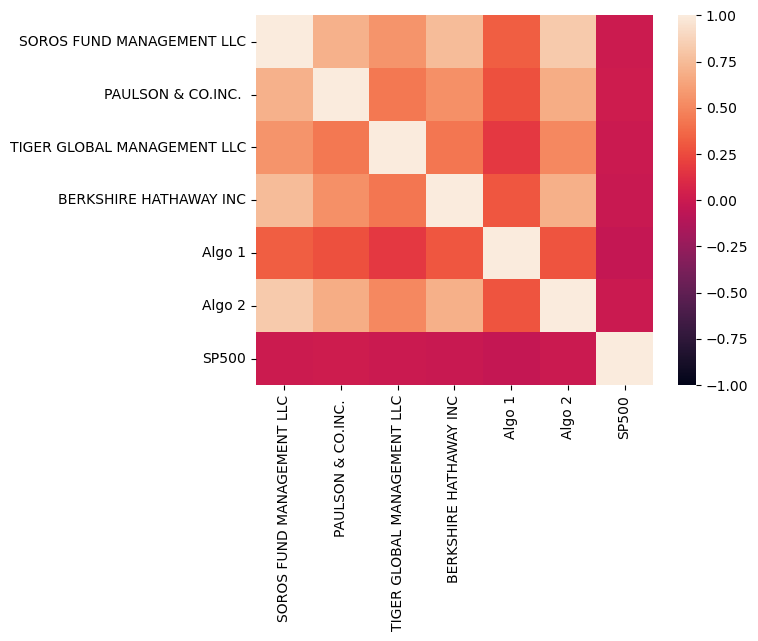

In [151]:
# Calculate the correlation
import seaborn as sns
correlation=joined_df.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation,vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

-2.2230425517155116e-06
7.373467552840441e-05
-0.03014921454233756


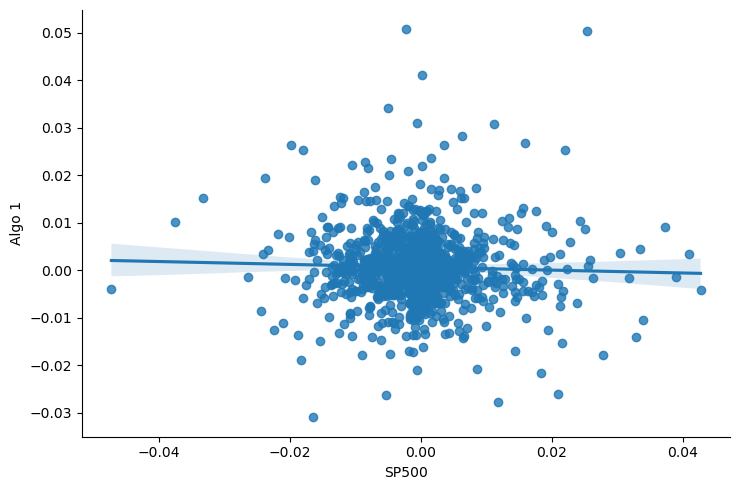

In [152]:
# Calculate covariance of a single portfolio
covariance = joined_df['Algo 1'].cov(joined_df['SP500'])
print(covariance)
# Calculate variance of S&P 500
variance = joined_df['SP500'].var()
print(variance)
# Computing beta
algo1_beta = covariance / variance
print(algo1_beta)
# Plot beta trend
sns.lmplot(x='SP500', y='Algo 1', data=joined_df, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [153]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [154]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_df.mean() * 252) / (sorted_stds * np.sqrt(252))
sharpe_ratios

Algo 1                         1.307002
Algo 2                         0.477170
BERKSHIRE HATHAWAY INC         0.610903
PAULSON & CO.INC.             -0.494849
SOROS FUND MANAGEMENT LLC      0.345265
SP500                         -0.547413
TIGER GLOBAL MANAGEMENT LLC   -0.131065
dtype: float64

<Axes: title={'center': 'Sharpe Ratios'}>

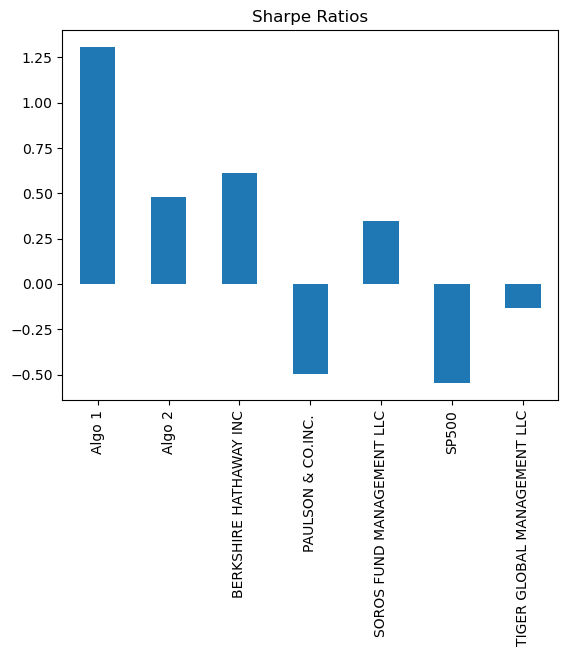

In [155]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
Algorithmic strategy 1 has the highest Sharpe Ratio among all investments, indicating strong risk-adjusted performance, outperforming the S&P 500 and whales portfolios.
Algorithmic strategy 2 also has a positive Sharpe Ratio, suggesting favorable risk-adjusted performance. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [156]:
# Reading data from 1st stock
cost_path = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.sort_index(ascending=True)
cost_df.drop(columns=['Symbol'], inplace=True)

# Print the resulting DataFrame
cost_df.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [157]:
# Reading data from 2nd stock
aapl_path = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.sort_index(ascending=True)
aapl_df.drop(columns=['Symbol'],inplace=True)
aapl_df.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [118]:
# Reading data from 3rd stock
goog_path = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.sort_index(ascending=True)
goog_df.drop(columns=['Symbol'],inplace=True)
goog_df.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [119]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([aapl_df, cost_df, goog_df], axis="columns", join="inner")
combined_df.columns=['AAPL','COST','GOOG']
combined_df.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-09,200.72,243.47,1162.38
2019-05-08,202.90,241.34,1166.27
2019-05-07,202.86,240.18,1174.10
2019-05-06,208.48,244.23,1189.39
2019-05-03,211.75,244.62,1185.40


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [120]:
# Calculate daily returns
daily_returns = combined_df.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,AAPL,COST,GOOG
Trade DATE,,,
2019-05-08,0.010861,-0.008749,0.003347
2019-05-07,-0.000197,-0.004806,0.006714
2019-05-06,0.027704,0.016862,0.013023
2019-05-03,0.015685,0.001597,-0.003355
2019-05-02,-0.012279,-0.007890,-0.019226


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [186]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.tail()


Trade DATE
2018-05-17    0.006112
2018-05-16    0.001618
2018-05-15   -0.009283
2018-05-14    0.010216
2018-05-11   -0.000012
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [181]:
# Join your returns DataFrame to the original returns DataFrame
all_returns = pd.concat([joined_df,portfolio_returns],axis="columns", join="inner")

In [187]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_returns.dropna(inplace=True)
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,0
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,-0.000883,-0.000012
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.010216
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.009283
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.001618
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,0.006112


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [188]:
# Calculate the annualized `std`
annualized_std = all_returns.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.146589
PAULSON & CO.INC.              0.116683
TIGER GLOBAL MANAGEMENT LLC    0.232434
BERKSHIRE HATHAWAY INC         0.246819
Algo 1                         0.133645
Algo 2                         0.139204
SP500                          0.152147
0                              0.213137
dtype: float64

### Calculate and plot rolling `std` with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
2019-04-15                   0.006804            0.006225   
2019-04-16                   0.006711            0.006224   
2019-04-17                   0.006773            0.006370   
2019-04-18                   0.006633            0.006303   
2019-04-22                   0.005915            0.006400   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
2019-04-15                     0.007525                0.009729  0.005496   
2019-04-16                     0.007532                0.009731  0.005760   
2019-04-17                     0.007574                0.009485  0.006229   
2019-04-18                     0.007328                0.009475  0.005834   
2019-04-22                     0.006197                0.009104  0.005831   

              Algo 2     SP500         0  
2019-04-15  0.007572  0.006532  0.007490  
2019-04-16  0.007053  0.006571  0.007651  
2019-04-17  0.007165  0.006505  0.007467 

<Axes: >

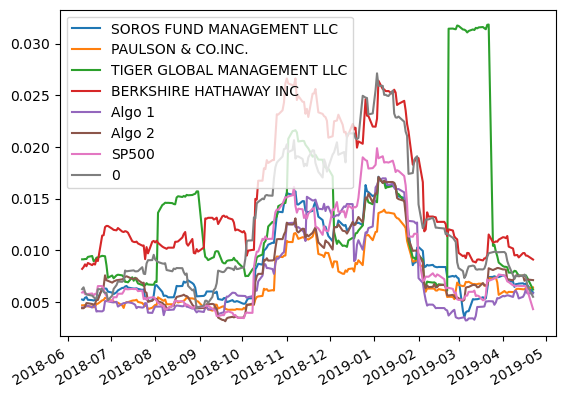

In [195]:
# Calculate rolling standard deviation
rolling_std_all = all_returns.rolling(window=21).std()
print(rolling_std_all.tail())
# Plot rolling standard deviation
rolling_std_all.plot()

### Calculate and plot the correlation

In [190]:
# Calculate and plot the correlation
all_correlation = all_returns.corr()
all_correlation.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,0
SOROS FUND MANAGEMENT LLC,1.000000,0.791031,0.476938,0.816190,0.336890,0.861989,-0.028091,0.061503
PAULSON & CO.INC.,0.791031,1.000000,0.484917,0.650132,0.360668,0.783856,-0.059893,0.025680
TIGER GLOBAL MANAGEMENT LLC,0.476938,0.484917,1.000000,0.323931,0.113568,0.408381,0.005812,0.036047
BERKSHIRE HATHAWAY INC,0.816190,0.650132,0.323931,1.000000,0.326025,0.781894,-0.038751,0.006755
Algo 1,0.336890,0.360668,0.113568,0.326025,1.000000,0.364440,-0.054454,0.073296


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: >

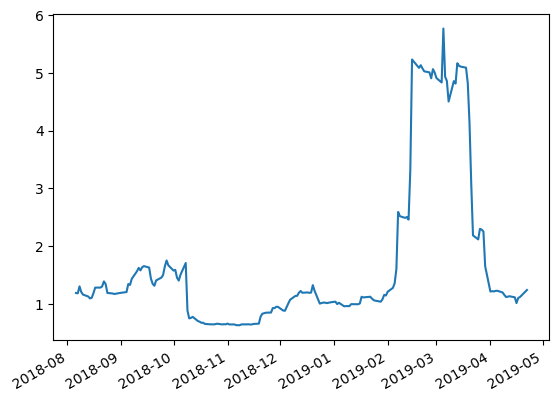

In [191]:
# Calculate and plot Beta
rolling_covariance = portfolio_returns.rolling(window=60).cov(all_returns['SP500'])
rolling_variance = all_returns['SP500'].rolling(window=30).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [194]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios = (all_returns.mean() * 252) / ((all_returns.std()) * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.344766
PAULSON & CO.INC.              0.236041
TIGER GLOBAL MANAGEMENT LLC   -1.052249
BERKSHIRE HATHAWAY INC         0.085005
Algo 1                         1.999866
Algo 2                         0.009467
SP500                         -0.432942
0                             -0.613547
dtype: float64

<Axes: title={'center': 'Sharpe Ratios All'}>

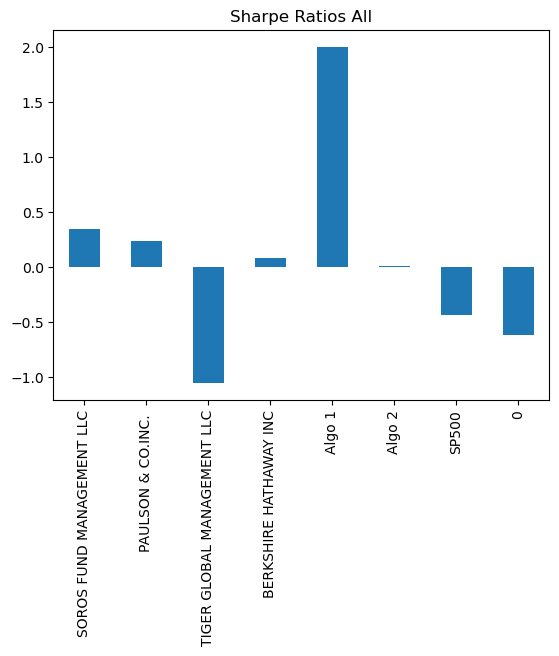

In [196]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title='Sharpe Ratios All')

### How does your portfolio do?

Write your answer here!

In [ ]:
# My portfolio has not generated enough return to compensate for the level of risk it carries.